In [28]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [29]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [30]:
# Create a test/train split
train_sample_mask = np.random.rand(len(train)) > 0.5
test_sample_mask = ~train_sample_mask
train_sample = train[train_sample_mask]
test_sample = train[test_sample_mask]

In [31]:
# Create our input count vector
count_vect = CountVectorizer(strip_accents='ascii', stop_words='english', max_features=1000)
train_counts = count_vect.fit_transform(train_sample['text']).toarray()
test_counts = count_vect.transform(test_sample['text']).toarray()

In [32]:
# Create our output label one-hot vector
train_labels = pd.get_dummies(train['genre'], columns=['genre']).values
test_labels = pd.get_dummies(train['genre'], columns=['genre']).values

In [33]:
def encode_genre(genre):
    genre_dict = {'drama':0, 'thriller':1, 'action':2, 'comedy':3, 'romance':4, 'sci-fi':5, 'adventure':6, 'horror':7, 'other': 8}
    return genre_dict[genre]
def decode_genre(genre_id):
    genre_id_dict = {0:'drama', 1:'thriller', 2:'action', 3:'comedy', 4:'romance', 5:'sci-fi', 6:'adventure', 7:'horror', 8:'other'}
    return genre_id_dict[genre_id]

In [34]:
train_labels = train_sample['genre'].apply(encode_genre)
test_labels = test_sample['genre'].apply(encode_genre)

In [35]:
# Let's try training our model on successively more data:
model = DecisionTreeClassifier()
results = list()
dataset_size = [10, 100, 1000, 5000, 10000]
for i in dataset_size:
    model.fit(train_counts[:i], train_labels[:i])
    result = model.score(test_counts[:1000], test_labels[:1000])
    print(result)
    results.append(result)

0.378
0.355
0.359
0.455
0.459


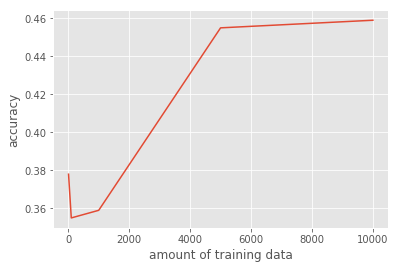

In [36]:
plt.style.use('ggplot')
plt.plot(dataset_size, results)
plt.ylabel("accuracy")
plt.xlabel("amount of training data")
plt.show()

In [37]:
predictions = model.predict(count_vect.transform(test['text']).toarray())